# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("../api.env")

# Setting Alpaca keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Set API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs ; changed conversion at the end to USD
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
btc_response = requests.get(btc_url).json()
eth_response = requests.get(eth_url).json()

btc_response

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18660756,
   'total_supply': 18660756,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 57550.0,
     'volume_24h': 53001892948,
     'market_cap': 1074176008338,
     'percentage_change_1h': -0.638960293083796,
     'percentage_change_24h': 0.436455599595934,
     'percentage_change_7d': -3.16116473984518,
     'percent_change_1h': -0.638960293083796,
     'percent_change_24h': 0.436455599595934,
     'percent_change_7d': -3.16116473984518}},
   'last_updated': 1616391006}},
 'metadata': {'timestamp': 1616391006,
  'num_cryptocurrencies': 1334,
  'error': None}}

In [6]:
btc_price = btc_response['data']['1']['quotes']['USD']['price']
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

btc_price
eth_price

1789.41

In [7]:
# Setting timeframe

timeframe = "1D"

# Setting current date ISO format

today = pd.Timestamp("2021-03-17", tz="America/New_York").isoformat()

# Setting Crypto list

tickers = ["BTC", "ETH"]

# Put crypto prices into dataframe

crypto_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

crypto_df.head()

BTC                           ETH                \
                          open high  low close volume   open   high    low   
time                                                                         
2021-03-17 04:00:00+00:00  NaN  NaN  NaN   NaN    NaN  28.27  28.68  28.14   

                                         
                          close  volume  
time                                     
2021-03-17 04:00:00+00:00  28.6  180970

In [8]:
# Fetch current BTC price
# Fetch current ETH price

btc_price = btc_response['data']['1']['quotes']['USD']['price']
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

In [9]:
# Compute current value of my crpto

my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

crypto_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69060.00
The current value of your 5.3 ETH is $9483.87


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [12]:
# Format current date as ISO format

today = pd.Timestamp("2021-03-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG

shares_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame

shares_df.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-03-17 00:00:00-04:00  113.55  113.9778  113.48  113.87  5023810  394.53   

                                                            
                             high    low   close    volume  
time                                                        
2021-03-17 00:00:00-04:00  398.12  393.3  397.22  61876016

In [13]:
# Pick AGG and SPY close prices

agg_close_price = float(shares_df["AGG"]["close"])
spy_close_price = float(shares_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.87
Current SPY closing price: $397.22


In [14]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

shares_value = my_spy_value + my_agg_value
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19861.00
The current value of your 200 AGG shares is $22774.00


### Savings Health Analysis

In [15]:
# Set monthly household income

monthly_income = float(12000)

# Create savings DataFrame
assets = ["crypto", "shares"]
amount = [crypto_value, shares_value]
df_savings = pd.DataFrame(amount, index=assets)

# Display savings DataFrame
display(df_savings)

0
crypto  78543.873
shares  42635.000

<AxesSubplot:ylabel='0'>

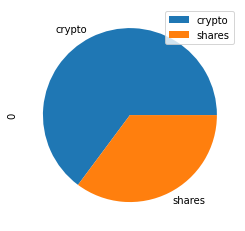

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y=0)

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations on meeting your financial goals!")
else:
    print(f"You still need {total_savings - emergency_fund} to meet your goal")

Congratulations! You have enough money in your emergency fund.


In [18]:
total_savings

121178.87299999999

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30173684   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  256921808  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.18  248430643  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  286308782  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  268298876  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  203576470

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [22]:
# Printing the simulation input data
MC_30.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30173684   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.18   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  256921808          NaN  
2020-03-19 00:00:00-04:00  248430643     0.000705  
2020-03-20 00:00:00-04:00  286308782    -0.050750  
2020-03-23 00:00:00-04:00  268298876    -0.028086  
2020-03-24 00:00:00-04:00  203576470     0.094737

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0             1             2             3             4    \
0     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     1.001936e+00  1.011955e+00  1.014214e+00  1.020529e+00  1.005960e+00   
2     1.008199e+00  1.010729e+00  1.003819e+00  1.013686e+00  1.021608e+00   
3     1.024319e+00  9.975576e-01  1.021393e+00  1.019696e+00  1.039864e+00   
4     1.031284e+00  9.913181e-01  9.923858e-01  1.025301e+00  1.048441e+00   
...            ...           ...           ...           ...           ...   
7556  2.366576e+08  1.919622e+08  6.416573e+07  1.588490e+08  2.182360e+08   
7557  2.418954e+08  1.943591e+08  6.409469e+07  1.590741e+08  2.200793e+08   
7558  2.435817e+08  1.936465e+08  6.316499e+07  1.587499e+08  2.192464e+08   
7559  2.373504e+08  1.930409e+08  6.283196e+07  1.563915e+08  2.195171e+08   
7560  2.382955e+08  1.939178e+08  6.172884e+07  1.576739e+08  2.202941e+08   

               5             6             7             8             9    \
0     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     1.024387e+00  9.919771e-01  1.022914e+00  1.001519e+00  9.972123e-01   
2     1.029248e+00  1.012988e+00  1.023049e+00  1.007848e+00  1.022707e+00   
3     1.047669e+00  9.880205e-01  1.045427e+00  1.016686e+00  1.023825e+00   
4     1.039437e+00  9.704857e-01  1.023402e+00  1.018863e+00  1.033138e+00   
...            ...           ...           ...           ...           ...   
7556  5.603377e+08  4.311856e+07  1.821655e+08  1.837033e+08  5.866055e+08   
7557  5.602603e+08  4.183072e+07  1.825268e+08  1.865559e+08  5.755100e+08   
7558  5.664143e+08  4.196743e+07  1.867496e+08  1.884836e+08  5.810510e+08   
7559  5.656130e+08  4.350035e+07  1.878778e+08  1.918100e+08  5.733707e+08   
7560  5.647817e+08  4.376004e+07  1.911011e+08  1.951919e+08  5.739047e+08   

      ...           490           491           492           493  \
0     ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     ...  9.889027e-01  9.892086e-01  1.010982e+00  1.003964e+00   
2     ...  9.760959e-01  1.005865e+00  1.019444e+00  1.003108e+00   
3     ...  9.882904e-01  1.005749e+00  9.848359e-01  9.916791e-01   
4     ...  9.723944e-01  9.916175e-01  9.926934e-01  1.004309e+00   
...   ...           ...           ...           ...           ...   
7556  ...  4.846125e+07  9.783748e+07  6.260189e+08  5.206595e+08   
7557  ...  4.908460e+07  9.744537e+07  6.291167e+08  5.144806e+08   
7558  ...  4.901488e+07  9.714175e+07  6.281161e+08  5.106004e+08   
7559  ...  4.904582e+07  9.711214e+07  6.323418e+08  5.116931e+08   
7560  ...  4.981235e+07  9.626896e+07  6.313930e+08  5.147305e+08   

               494           495           496           497           498  \
0     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     1.002203e+00  9.997098e-01  1.014142e+00  1.001010e+00  1.008834e+00   
2     1.001837e+00  1.017045e+00  1.014386e+00  9.883580e-01  1.027431e+00   
3     1.021128e+00  1.002739e+00  1.001442e+00  9.941749e-01  1.041890e+00   
4     1.029298e+00  1.001707e+00  9.763534e-01  9.896974e-01  1.039275e+00   
...            ...           ...           ...           ...           ...   
7556  2.797079e+07  2.329386e+08  3.489792e+08  5.180747e+08  5.624765e+08   
7557  2.775599e+07  2.330130e+08  3.430195e+08  5.240641e+08  5.693714e+08   
7558  2.758078e+07  2.352716e+08  3.418846e+08  5.180759e+08  5.627084e+08   
7559  2.718298e+07  2.394819e+08  3.415573e+08  5.206738e+08  5.709235e+08   
7560  2.789521e+07  2.437052e+08  3.409404e+08  5.172858e+08  5.710688e+08   

               499  
0     1.000000e+00  
1     9.730907e-01  
2     9.716313e-01  
3     9.717558e-01  
4     9.862583e-01  
...            ...  
7556  3.100121e+07  
7557  3.082368e+07  
7558  3.076937e+07  
7559  3.138672e+07  
7560  3.101728e+07  

[7561 rows x 500 columns]

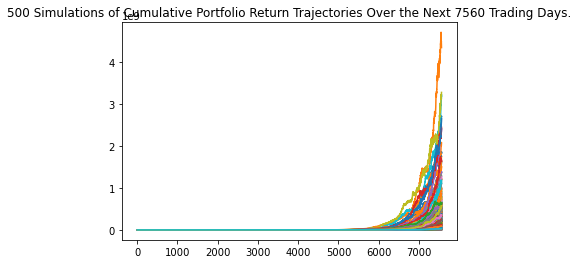

In [26]:
# Plot simulation outcomes
MC_30_line = MC_30.plot_simulation()

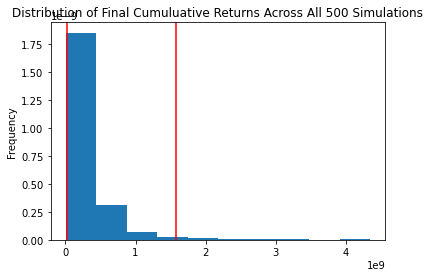

In [27]:
# Plot probability distribution and confidence intervals
MC_30_dist = MC_30.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30_sum = MC_30.summarize_cumulative_return()

# Print summary statistics
print(MC_30_sum)

count           5.000000e+02
mean            3.042131e+08
std             4.460068e+08
min             6.059455e+06
25%             7.400261e+07
50%             1.698570e+08
75%             3.453247e+08
max             4.343816e+09
95% CI Lower    1.711658e+07
95% CI Upper    1.570335e+09
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_30_sum[8] * initial_investment,2)
ci_upper = round(MC_30_sum[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $342331668985.06 and $31406706246288.55


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_30_sum[8] * initial_investment,2)
ci_upper = round(MC_30_sum[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $513497503477.59 and $47110059369432.83


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")